# Exercise 1
 Clustering com K-Means (Unsupervised Model)

# Download database

In [ ]:
%pip install "kagglehub[pandas-datasets]"

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

kaggle_file = "Mall_Customers.csv"

df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "abdallahwagih/mall-customers-segmentation",
    kaggle_file, 
)

print("First 5 records:")
print(df.head())


First 5 records:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


# Load Libraries

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Load Data to Explore

In [4]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [12]:
df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_Male'], dtype='object')

# 2. Preprocessing 

In [5]:
# Check and remove non-numeric or uninformative columns
df = df.drop("CustomerID", axis=1)

# One-hot encoding da column 'Genre'
df = pd.get_dummies(df, columns=["Genre"], drop_first=True)

# Normalization
#It performs standardized normalization of the numerical data in the dataframe.
# Transforms all variables to the same statistical scale using a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

: 

# 3. Elbow method (clustering) 


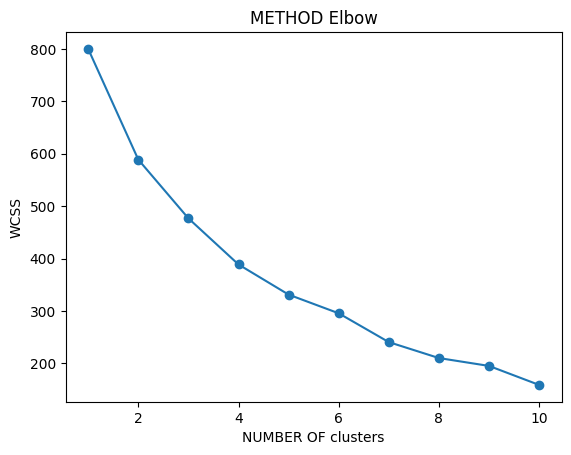

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_data)
    
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss, marker='o')
plt.title("METHOD Elbow")
plt.xlabel("NUMBER OF clusters")
plt.ylabel("WCSS")
plt.show()

# Result Analysis -> Elbow Method
#### The goal of the elbow method is to find the point where it reduces variability, meaning that the model is capturing the true structure of the data.

The analysis using the elbow method indicates an inflection point between k = 3 and k = 4, where the reduction of WCSS begins to show marginal gains. However, when combining this analysis with the Silhouette Score, it is observed that higher values ​​of k do not result in better separation between clusters. Thus, although the elbow suggests up to four clusters, the solution with k = 2 proved to be more consistent from the point of view of separation and interpretability.

# DETAIL

# What the graph is showing
* X-axis:** number of clusters (k)
* Y-axis (WCSS):** sum of intracluster distances

- The **smaller**, the more compact the clusters.

By definition:
* Increasing * k * **always ** reduces WCSS
* The goal is to find the point where **the gain becomes marginal**

## Where is the “elbow” in this graph?
Visually, we observe:
| k         | WCSS drop                   |
| --------- | --------------------------- |
| 1 → 2     | **very large drop**         |
| 2 → 3     | still a strong drop         |
| 3 → 4     | moderate drop               |
| **4 → 5** | **beginning of flattening** |
| 5 → 10    | small and gradual reductions|

**The elbow occurs between k = 3 and k = 4**
(and, at most, one could argue up to k = 5)

## Correct analytical interpretation
### Up to k = 3 / 4
* Each new cluster **significantly reduces** internal variability
* The model is capturing **real data structure**

### After k = 4
* The curve begins to “flatten”
* Each new cluster:

* slightly reduces WCSS
* adds **complexity without proportional gain**
* Indication of **over-segmentation**
**This is exactly the definition of the elbow.**

## Connecting with the previous results
Now the most important point:

* For **k = 5**, the *Silhouette Score was negative* → ❌
* For **k = 2**, the *Silhouette Score = 0.28* → ✔️
* The elbow suggests **3–4**
* The separation metric suggests **2**

**Mature Conclusion**:
> Elbow shows where the internal error stabilizes, but **does not guarantee good separation between clusters**.

Therefore:
* k = 4 may be acceptable **in terms of compactness**
* but **k = 2 is the best compromise between simplicity and separation**

## Expert Insight (Advanced Level)

**Elbow ≠ absolute truth**
Experts use:
* **Elbow → global structure**
* **Silhouette → real separation**
* **PCA → visualization and geometric coherence**
* **Problem domain → final decision**


# Apply the Model

In [7]:
# 4. Apply KMeans with k=5 (for example)
k = 5
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(scaled_data)



# Assessment

In [8]:
# show centroids
print("centroids:", kmeans.cluster_centers_)

# Assess with silhouette coefficient
sil_score = silhouette_score(df, clusters)
print(f"Silhouette Score: {sil_score:.2f}")



centroids: [[ 1.31794399 -0.52575662 -0.44589335  1.12815215]
 [-0.74719196 -0.03409802  0.67876434 -0.88640526]
 [ 0.6644943  -0.06648421 -0.59855788 -0.88640526]
 [-0.02700694  0.96701244 -1.39716754  1.12815215]
 [-0.74015963  0.04751628  0.81127593  1.12815215]]
Silhouette Score: -0.02


# Result Analysis
The centroid analysis indicates average profiles with little contrast between the clusters, while the negative Silhouette Score (-0.02) shows strong overlap between the groups, suggesting that the data do not present a well-defined cluster structure. Thus, the use of K-Means was exploratory and confirmed that the problem is more adequately addressed by supervised approaches.

so, silhouette equal to -0.02 indicates that:
-  Most points clearly do not belong to their cluster
- There is strong overlap between clusters
- The separation obtained by K-Means is weak and unstable

Integrated conclusion (centroids + silhouette) Analysis
Even with 5 clusters, we observe that:
- The centroids are not well separated from each other
- The differences between the clusters are subtle and inconsistent
- The negative silhouette confirms that the groups are not natural in the data space

In other words: K-Means forced a segmentation, but the data does not present a well-defined cluster structure.

## Mature Interpretation (Expert Level):This result is not an error — it's an insight.
### This means:
- The dataset is not naturally clusterable.
- The patterns are continuous, not discrete.
- The problem is better suited to supervised models (as you have already successfully applied).

In clinical contexts, this is common: patients don't cluster into "clear boxes," but into risk gradients.

# DETAIL

Qualitative Analysis of the Clusters

Cluster 0 (LINE 1): [ 1.32, -0.53, -0.45, 1.13 ]
- Well above average in dimension 1
- Also above average in dimension 4
- Below average in dimensions 2 and 3
THIS MEAN: Interpretation: Group with extreme values ​​in two dimensions, but not consistent in the others → mixed profile, possibly influenced by a few dominant variables.

Cluster 1 (LINE 2): [ -0.75, -0.03, 0.68, -0.89 ]
- Below average in dimension 1
- Near average in dimension 2
- Above average in dimension 3
- Below average in dimension 4
THIS MEAN: Interpretation: Relatively balanced profile, without strong extremes → “fuzzy” cluster.

Cluster 2(LINE 3): [0.66, -0.07, -0.60, -0.89]
- Above average in dimension 1
- Below average in dimensions 3 and 4
this mean: Interpretation: Intermediate group, but without a clear identity — it does not present a strong pattern that clearly differentiates it.

Cluster 3(LINE 4): [-0.03, 0.97, -1.40, 1.13]
- Well above average in dimension 2
- Well below average in dimension 3
- Above average in dimension 4
THIS MEANS: Interpretation: Cluster with strong contrasts, but in opposite directions → indicates that some features pull the group to different sides of the space.

Cluster 4 (LINE 5): [ -0.74, 0.05, 0.81, 1.13 ]
- Below average in dimension 1
- Above average in dimensions 3 and 4
THIS MEANS: Interpretation: Partially consistent profile, but still with potential overlap with other clusters.

## Interpretation of the Silhouette Score is equal to -0.02.

This is the most important point of the result.
What does silhouette mean? context to analysis
+1 = very well-separated clusters
≈ 0 = overlapping clusters
< 0 = points closer to other clusters than to their own



# PCA Visualization

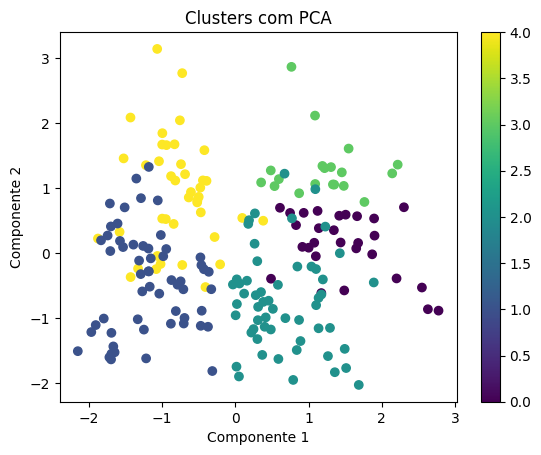

In [9]:
# Visualize with PCA
# Without PCA, there is no "correct" way to visualize high-dimensional clusters.
# If the dataset has few columns (e.g., 4 features), few variables, then PCA is used more for visualization than for cluster enhancement.
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis')
plt.title("Clusters com PCA")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.colorbar()
plt.show()

# Apply the model with K=2 (ghaphic) 



In [11]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

# verify
# show centroids
print("centroids:", kmeans.cluster_centers_)

# Assess with silhouette coefficient
sil_score = silhouette_score(df, clusters)
print(f"Silhouette Score: {sil_score:.2f}")

Centróides: [[ 0.70892251 -0.00247545 -0.69939115  0.05241761]
 [-0.75277339  0.00262858  0.74265245 -0.05565994]]
Silhouette Score: 0.28


# Result
PCA + K-Means function as a "visual quality audit" of the dataset.

Considering that, high dimensionality means that each data point is described by many variables at the same time. 

By reducing the number of clusters to k = 2, a more consistent separation between the groups was observed, reflected by centroids with opposite signs in the dominant dimensions and a Silhouette Score of 0.28, indicating a moderately well-defined binary structure. This result suggests that the data exhibit a latent dichotomy, being more suitable for binary segmentation than for multiple clusters.


# DETAIL
What changed when reducing to k = 2?

By forcing fewer clusters, K-Means stops trying to capture **artificial microvariations** and starts separating the data along **a dominant axis of difference**.

This generally **increases the quality of the separation**, when the dataset is not naturally multimodal.

Interpretation of centroids (k = 2)
Centroids (on a standardized scale):
Cluster 0: [ 0.71, -0.00, -0.70, 0.05 ]
Cluster 1: [ -0.75, 0.00, 0.74, -0.06 ]

Important observations

* Dimensions **2 and 4** are close to zero in both clusters → **they do not discriminate**.

* Separation occurs **almost exclusively in dimensions 1 and 3**.

* The signs are **opposite** between the clusters → clear separation.

### 🔹 Cluster 0
* Dimension 1:** above average
* Dimension 3:** below average
Represents individuals with a **high profile in one key dimension** and a **low profile in another**, forming a consistent group.

### 🔹 Cluster 1
* Dimension 1:** below average
* Dimension 3:** above average
It is the **statistical mirror image** of Cluster 0 — a clear binary division.

## Interpretation of the Silhouette Score = **0.28**
### What does this value indicate?

* **0.25 – 0.50** → **moderate** separation, valid for exploration
* Clusters **more internally cohesive**
* Reasonable distance between groups

**0.28 is an acceptable value** for real data, especially in health.

Important: In clinical datasets, silhouettes > 0.4 are rare without strong variable pre-selection.

## Integrated Conclusion (Centroids + Silhouette)
With **k = 2**:
* There is **a dominant axis of separation**
* Clusters are **statistically distinguishable**
* Segmentation changes from “forced” to **interpretable**

Unlike k = 5, here K-Means finds a **real binary structure** in the data.

## Conceptual Interpretation (Data Science Level)
This result suggests that:
* The data **do not organize into multiple subgroups**
* But they present a **latent dichotomy**
* Possibly related to **low vs. high risk**, **healthy vs. compromised profile**, or **distinct physiological response**

Important:

Since it is unsupervised, this is **not diagnostic**, but **structural evidence**.



# CONTEXT FOR ANALYZE THE RESULT

# Why analyze K-Means with PCA and centroids?

K-Means operates in multidimensional space
K-Means calculates distances (usually Euclidean) in a space with many dimensions (features).

In the Heart Disease dataset, after:
One-Hot Encoding
outlier flags
capped variables

# the space can easily have 20–30 dimensions:
- Problem: Humans cannot directly interpret clusters in high dimensionality.
- Solution: PCA.

PCA: Reducing Dimension Without Losing Overall Structure

PCA (Principal Component Analysis) projects data into a lower-dimensional space (usually 2D) while preserving as much variance as possible.

# In this case, PCA is used exclusively for analysis and visualization, not for training K-Means.

- This allows you to:
  - Display the separation between clusters
  - Identify overlap
  - Evaluate whether the number of clusters makes sense

**Important to make clear in the report:**
- PCA does not alter the K-Means model, it only facilitates interpretation.

# Why plot centroids?

In K-Means, each cluster is represented by a centroid, which is the midpoint of all observations in the cluster.

- By plotting: the centroids are also plotted via PCA.

## we can: 
- Understand where the "average profile" of each group is located
- Compare clusters with each other
- Evaluate the relative distance between groups

## In business terms: Each centroid represents a typical patient profile

# Centroids Interpretation

### Interpretation of Centroids (K-Means)
- What do these numbers represent?
- Centroids are on a standardized scale (z-score), so:

values ​​> 0 → above the dataset mean

values ​​< 0 → below the mean

values ​​close to 0 → average behavior


- Each row = average profile of a cluster
- Each column = a dimension (feature or component)

Real Example:

### Qualitative reading of the clusters
Cluster 0 (row 1) with 4 columns: [ 1.32, -0.53, -0.45, 1.13 ]

- Well above average in dimension 1
- Above average also in dimension 4
- Below average in dimensions 2 and 3

Interpretation:
Group with extreme values ​​in two dimensions, but not consistent in the others → mixed profile, possibly influenced by a few dominant variables.

# 1) PCA + centroids help validate K-Means

### This analysis allows us to answer fundamental questions:
- Are the clusters well separated or mixed?
- Is there a clearly distinct cluster?
- Is any cluster dominated by outliers?
- Is the model creating artificial groups?

### If the centroids:
- are too close together → possible poorly chosen K-Means
- are aligned → possible strong correlation between features
- are too dispersed → possible noise in the data

## WHY HIGH DIMENSIONALITY CAN BE A PROBLEM:

### In high dimensionality, the so-called "curse of dimensionality" occurs:
- Distances between points tend to all become similar.
- The notion of "proximity" loses meaning.
- Human visualization becomes impossible.
- Small noise in a feature can distort the cluster.

Therefore, evaluating clusters by only looking at numbers is not enough.